In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


**Loading data**

In [2]:
df = pd.read_csv('../input/hotel-booking-demand/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Separating "reservation_status_date" into year, month and day**

In [5]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

*Dropping reservation_status**(duplicate column)** and reservation_status_date(**seperated into day, month and year**)*

In [6]:
df = df.drop(["reservation_status","reservation_status_date",],axis=1)

In [7]:
print(pd.DataFrame({'Null Values(in %)' : (df.isna().sum()) / (df.shape[0]) * (100)}).sort_values(ascending = False, by='Null Values(in %)'))


                                Null Values(in %)
company                                 94.306893
agent                                   13.686238
country                                  0.408744
children                                 0.003350
hotel                                    0.000000
assigned_room_type                       0.000000
booking_changes                          0.000000
deposit_type                             0.000000
days_in_waiting_list                     0.000000
previous_bookings_not_canceled           0.000000
customer_type                            0.000000
adr                                      0.000000
required_car_parking_spaces              0.000000
total_of_special_requests                0.000000
year                                     0.000000
month                                    0.000000
reserved_room_type                       0.000000
is_repeated_guest                        0.000000
previous_cancellations                   0.000000


*Dropping company and agent (***High percentage of NaN***)*

In [8]:
df = df.drop(["company","agent"],axis=1)

*Filling NaN with 0 in children and with "UNKNOWN" in country*

In [9]:
df["children"].fillna(0,inplace = True)
df["country"].fillna("UNKNOWN",inplace = True)

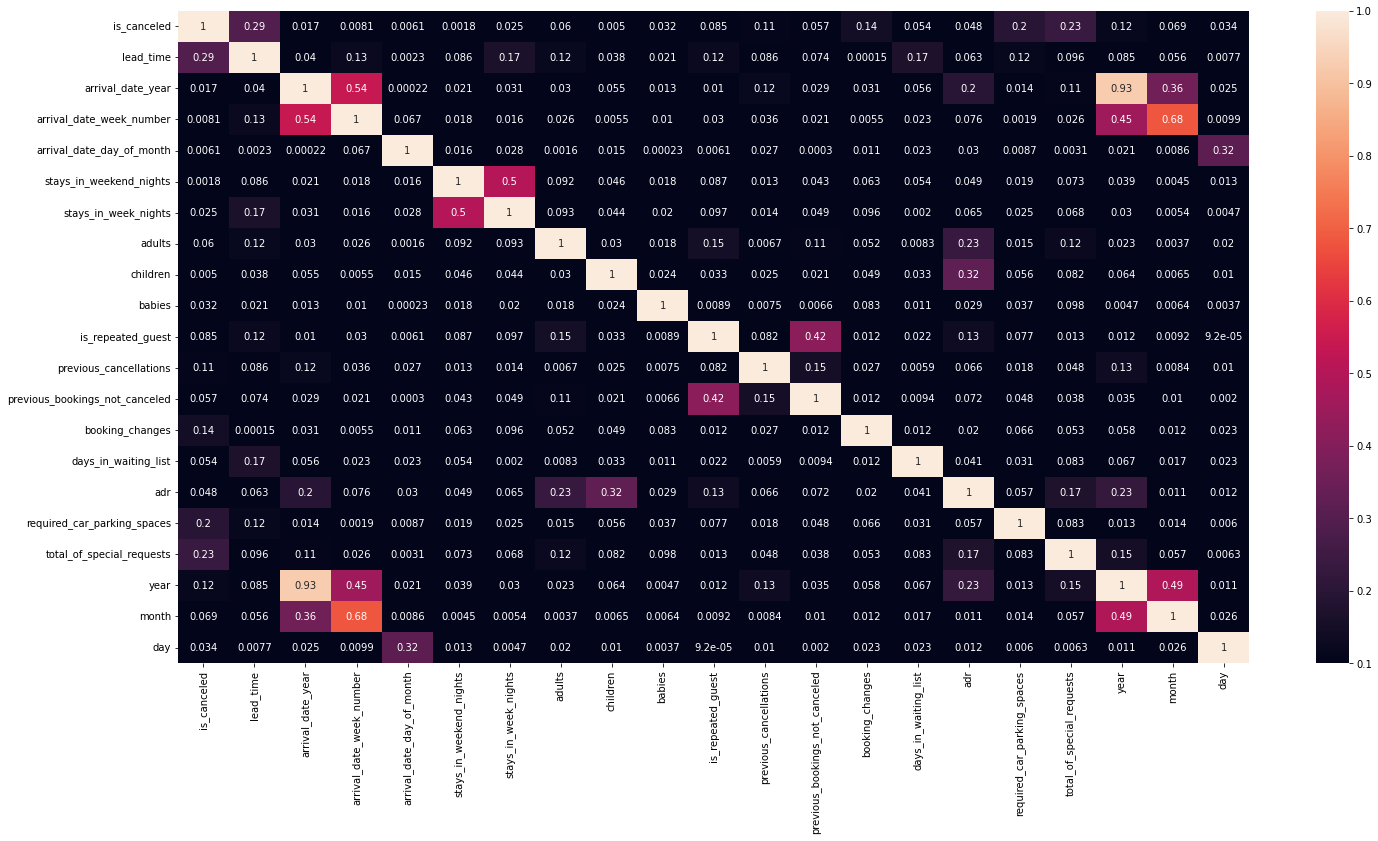

In [10]:
corr = abs(df.corr())
plt.figure(figsize = (24, 12))
sns.heatmap(corr,vmin = 0.1, annot = True)
plt.show()

In [11]:
print(corr['is_canceled'].sort_values(ascending = False))

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
year                              0.117036
previous_cancellations            0.110133
is_repeated_guest                 0.084793
month                             0.068605
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
day                               0.034131
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64


*Seperating data into categorical columns and numerical columns*

In [12]:
cat_columns = []
for col in df.columns:
    if df[col].dtype == 'O':
        cat_columns.append(col)
cat_df = df[cat_columns]
cat_df1 = df[cat_columns]
num_df = df.drop(cat_columns,axis=1)

*Printing categories present in categorical columns*

In [13]:
for column in cat_df.columns:
    print(f"{column}:\n{cat_df[column].unique()}\n")


hotel:
['Resort Hotel' 'City Hotel']

arrival_date_month:
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal:
['BB' 'FB' 'HB' 'SC' 'Undefined']

country:
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'UNKNOWN' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL'
 'UZB' 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'K

*Encoding categorical columns with One_Hot_Encoder*

In [14]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(handle_unknown="ignore")
cat_df = one_hot_encoder.fit_transform(cat_df)
cat_df = pd.DataFrame(cat_df.toarray())


*Encoding categorical columns with Ordinal_Encoder*


In [15]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
cat_df1 = ordinal_encoder.fit_transform(cat_df1)
cat_df1 = pd.DataFrame(cat_df1)

*Joining categorical and numerical columns into a single dataframe*

In [16]:
df = pd.concat([cat_df,num_df], axis=1)
df1 = pd.concat([cat_df1,num_df], axis=1)

*Creating training and testing set with equal representation of every month*

In [17]:
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [18]:
for train_index, test_index in split.split(df, df["month"]):
        train_set = df.loc[train_index]
        test_set = df.loc[test_index]
        
for train_index, test_index in split.split(df1, df1["month"]):
        train_set1 = df1.loc[train_index]
        test_set1 = df1.loc[test_index]

In [19]:
pd.DataFrame({"test_set":test_set["month"].value_counts() / len(test_set),"train_set":train_set["month"].value_counts() / len(train_set)})

,test_set,train_set
7,0.101390,0.101401
8,0.094229,0.094219
10,0.093350,0.093329
1,0.089455,0.089465
5,0.086314,0.086303
3,0.085686,0.085686
4,0.083759,0.083749
2,0.079571,0.079550
9,0.078734,0.078765
6,0.077687,0.077718


*Seperating features and label*

In [20]:
x_train = train_set.drop("is_canceled", axis=1)
y_train = train_set["is_canceled"].copy()
x_test = test_set.drop("is_canceled", axis=1)
y_test = test_set["is_canceled"].copy()

x_train1 = train_set1.drop("is_canceled", axis=1)
y_train1 = train_set1["is_canceled"].copy()
x_test1 = test_set1.drop("is_canceled", axis=1)
y_test1 = test_set1["is_canceled"].copy()

***Logistic Regression***

In [21]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(solver='liblinear').fit(x_train, y_train)
logisticReg1 = LogisticRegression(solver='liblinear').fit(x_train1, y_train1)

pred = logisticReg.predict(x_test)
pred1 = logisticReg1.predict(x_test1)

from sklearn.metrics import accuracy_score
print(f"Accuracy with ONE_HOT_ENCODING: {accuracy_score(y_test, pred)}")
print(f"Accuracy with ORDINAL_ENCODING: {accuracy_score(y_test1, pred1)}")

Accuracy with ONE_HOT_ENCODING: 0.9262919842532875
Accuracy with ORDINAL_ENCODING: 0.9317363263254879


***KNN Classifier***

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(x_train, y_train)
knn1 = KNeighborsClassifier().fit(x_train1, y_train1)

pred = knn.predict(x_test)
pred1 = knn1.predict(x_test1)

print(f"ONE_HOT_ENCODING: {accuracy_score(y_test, pred)}")
print(f"ORDINAL_ENCODING: {accuracy_score(y_test1, pred1)}")

ONE_HOT_ENCODING: 0.8919507496440238
ORDINAL_ENCODING: 0.8566881648379261


***Random Forest Classifier***

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(x_train, y_train)
clf1 = RandomForestClassifier().fit(x_train1, y_train1)

pred = clf.predict(x_test)
pred1 = clf1.predict(x_test1)

print(f"Accuracy ONE_HOT_ENCODING: {accuracy_score(y_test, pred)}")
print(f"Accuracy ORDINAL_ENCODING: {accuracy_score(y_test1, pred1)}")

Accuracy ONE_HOT_ENCODING: 0.9487813049669152
Accuracy ORDINAL_ENCODING: 0.9569478180752157


***CatBoost Classifier***

In [24]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(verbose=False).fit(x_train, y_train)
clf1 = CatBoostClassifier(verbose=False).fit(x_train1, y_train1)

pred = clf.predict(x_test)
pred1 = clf1.predict(x_test1)

print(f"Accuracy with ONE_HOT_ENCODING: {accuracy_score(y_test, pred)}")
print(f"Accuracy with ORDINAL_ENCODING: {accuracy_score(y_test1, pred1)}")

Accuracy with ONE_HOT_ENCODING: 0.9984085769327414
Accuracy with ORDINAL_ENCODING: 0.9991205293575677
